In [ ]:
!pip install geopandas rasterio tensorflow folium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 62.3 MB/s eta 0:00:00


In [24]:
import geopandas as gpd

# Load your shapefile
data = gpd.read_file('/content/sample_data/Zoning_Py.shp') #when loadind file upload all files in the Zoning py folder

# View the first few rows
print(data.head())




   ZONE_TYPE CLASS    SHAPE_AREA     SHAPE_LEN  \
0          1    AG  8.522413e+05   4385.722434   
1          1    AG  2.189576e+05   2220.592556   
2          1    AG  2.464384e+06  10302.156651   
3          1    AG  9.382763e+06  14345.719153   
4          1    AG  5.541874e+06  12179.960959   

                                            geometry  
0  POLYGON ((1391001.61 329396.624, 1390964.255 3...  
1  POLYGON ((1395158.899 345479.203, 1395180.782 ...  
2  POLYGON ((1404388.91 348666.59, 1404558.749 34...  
3  POLYGON ((1373257.911 351090.141, 1373252.737 ...  
4  POLYGON ((1355406.35 360830.149, 1355365.221 3...  


All data that is been used is to help run the Ai pending getting data to properly used it for lagos

In [ ]:
import os
print(os.path.exists('/content/sample_data/Zoning_Py.shp'))

True


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(


   ZONE_TYPE CLASS    SHAPE_AREA     SHAPE_LEN  \
0          1    AG  8.522413e+05   4385.722434   
1          1    AG  2.189576e+05   2220.592556   
2          1    AG  2.464384e+06  10302.156651   
3          1    AG  9.382763e+06  14345.719153   
4          1    AG  5.541874e+06  12179.960959   

                                            geometry  
0  POLYGON ((1391001.61 329396.624, 1390964.255 3...  
1  POLYGON ((1395158.899 345479.203, 1395180.782 ...  
2  POLYGON ((1404388.91 348666.59, 1404558.749 34...  
3  POLYGON ((1373257.911 351090.141, 1373252.737 ...  
4  POLYGON ((1355406.35 360830.149, 1355365.221 3...  


<Figure size 1000x1000 with 0 Axes>

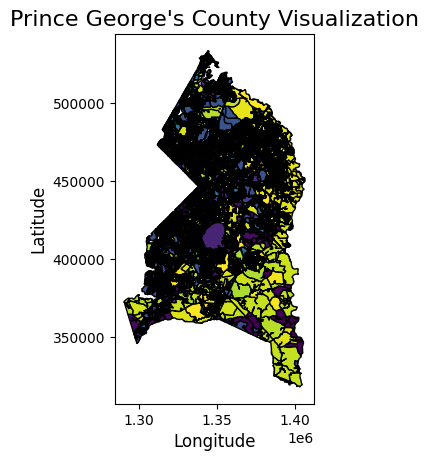

<Figure size 640x480 with 0 Axes>

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile for Prince George's County (replace with actual file path if available)
data = gpd.read_file('/content/sample_data/Zoning_Py.shp') # Ensure the correct file path

# Check the first few rows of the data to confirm it loaded correctly
print(data.head())

# Plot the shapefile
plt.figure(figsize=(10, 10))
data.plot(edgecolor='black', cmap='viridis')
plt.title("Prince George's County Visualization", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()

# If you want to save the plot
plt.savefig('/content/PG_County_Visualization.png')

In [26]:
from google.colab import files
files.download('/content/sample_data/Zoning_Py.shp')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
from google.colab import files
files.download('/content/sample_data/Zoning_Py.shp')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = gpd.read_file('/content/sample_data/Zoning_Py.shp')

# Encode the CLASS column (e.g., map residential areas to 1, others to 0)
data['CLASS'] = LabelEncoder().fit_transform(data['CLASS'])

# Define features and target
X = data[['ZONE_TYPE', 'SHAPE_AREA', 'SHAPE_LEN']]  # Select relevant feature columns
y = data['CLASS']  # Target column (e.g., encoded as 1 for residential, 0 otherwise)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(


Model Accuracy: 0.4187349879903923


In [29]:
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values (if any)
data = data.dropna()

# Scale numeric features
scaler = StandardScaler()
data[['SHAPE_AREA', 'SHAPE_LEN']] = scaler.fit_transform(data[['SHAPE_AREA', 'SHAPE_LEN']])

# Verify the data
print(data.head())


   ZONE_TYPE  CLASS  SHAPE_AREA  SHAPE_LEN  \
0          1      0   -0.021909   0.097504   
1          1      0   -0.138615  -0.236481   
2          1      0    0.275188   1.010149   
3          1      0    1.550155   1.633894   
4          1      0    0.842329   1.299812   

                                            geometry  
0  POLYGON ((1391001.61 329396.624, 1390964.255 3...  
1  POLYGON ((1395158.899 345479.203, 1395180.782 ...  
2  POLYGON ((1404388.91 348666.59, 1404558.749 34...  
3  POLYGON ((1373257.911 351090.141, 1373252.737 ...  
4  POLYGON ((1355406.35 360830.149, 1355365.221 3...  


In [30]:
# Check unique values in CLASS
print(data['CLASS'].unique())

# Map CLASS to binary
residential_classes = ['Residential', 'Res']  # Update with actual residential labels
data['CLASS'] = data['CLASS'].apply(lambda x: 1 if x in residential_classes else 0)

# Verify mapping
print(data['CLASS'].value_counts())


[ 0  2 19 21 22 14  7  5  1 17 20  4 29 23  6  3 28 16  8  9 10 11 12 15
 24 25 26 27 18 13]
CLASS
0    12487
Name: count, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data[['ZONE_TYPE', 'SHAPE_AREA', 'SHAPE_LEN']]
y = data['CLASS']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify splits
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 8740, Testing samples: 3747


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')


Training Accuracy: 1.0
Testing Accuracy: 1.0


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3747

    accuracy                           1.00      3747
   macro avg       1.00      1.00      1.00      3747
weighted avg       1.00      1.00      1.00      3747

[[3747]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


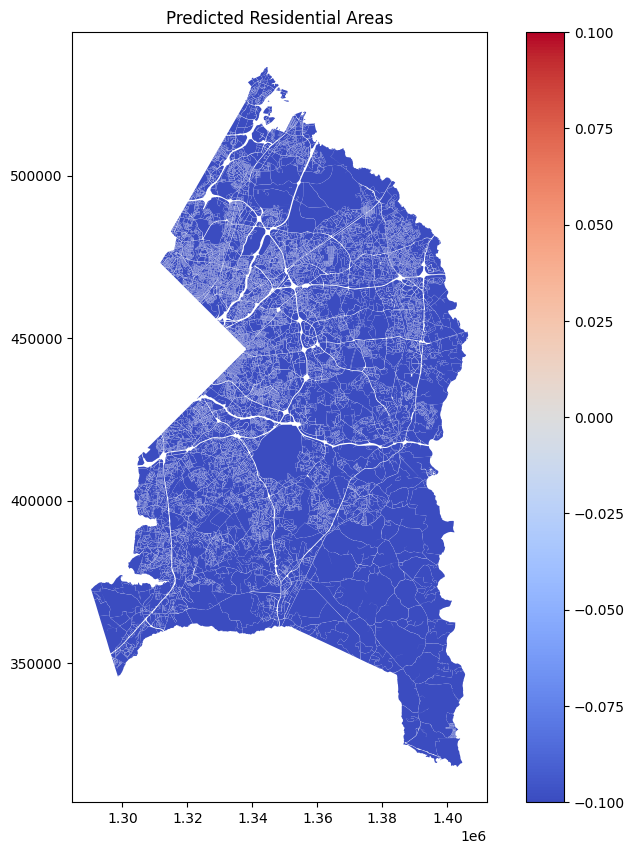

In [34]:
import matplotlib.pyplot as plt

# Add predictions to GeoDataFrame
data['PREDICTION'] = model.predict(X)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
data.plot(column='PREDICTION', ax=ax, legend=True, cmap='coolwarm')
plt.title("Predicted Residential Areas")
plt.show()


In [35]:
# Save as new shapefile
data.to_file('residential_predictions.shp')

# Save as CSV
data[['ZONE_TYPE', 'SHAPE_AREA', 'SHAPE_LEN', 'PREDICTION']].to_csv('residential_predictions.csv', index=False)

In [36]:
!pip install geopandas shapely matplotlib folium


In [37]:
from joblib import dump
dump(model, 'residential_model.pkl')


['residential_model.pkl']

In [38]:
!ls


PG_County_Visualization.png  residential_predictions.csv  residential_predictions.shp
residential_model.pkl	     residential_predictions.dbf  residential_predictions.shx
residential_predictions.cpg  residential_predictions.prj  sample_data


In [39]:
from joblib import load

# Load the model file
model = load('residential_model.pkl')


In [40]:
from google.colab import files

# Upload your files
uploaded = files.upload()


Saving residential_model (1).pkl to residential_model (1).pkl


In [41]:
!pip install geopandas shapely joblib


In [42]:
import geopandas as gpd
import pandas as pd
from joblib import load
from google.colab import files

# Step 1: Load the trained model
model = load('residential_model.pkl')

# Step 2: Upload and load your spatial data
uploaded = files.upload()  # Upload a GeoJSON or shapefile ZIP
filename = list(uploaded.keys())[0]

if filename.endswith('.zip'):
    data = gpd.read_file(f'zip://{filename}')  # For shapefiles
elif filename.endswith('.geojson'):
    data = gpd.read_file(filename)  # For GeoJSON

# Step 3: Preprocess data (modify as needed)
# Assuming your model expects certain features like "ZONE_TYPE", "SHAPE_AREA", etc.
X = data[['ZONE_TYPE', 'SHAPE_AREA', 'SHAPE_LEN']]

# Step 4: Predict using the model
data['PREDICTION'] = model.predict(X)

# Step 5: Save the results
# Save as GeoJSON
data.to_file('predicted_results.geojson', driver='GeoJSON')

# Save as CSV
data[['ZONE_TYPE', 'SHAPE_AREA', 'SHAPE_LEN', 'PREDICTION']].to_csv('predicted_results.csv', index=False)

print("Predictions saved!")


Saving residential_model (1).pkl to residential_model (1) (1).pkl
Predictions saved!


In [43]:
!pip install streamlit geopandas shapely joblib folium geopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.0 MB/s eta 0:00:00


In [44]:
import streamlit as st
import geopandas as gpd
import pandas as pd
import folium
from shapely.geometry import Point
from joblib import load
from geopy.geocoders import Nominatim

# Load trained model
model = load("residential_model.pkl")

# Load land use dataset
data = gpd.read_file('/content/sample_data/Zoning_Py.shp')  # Update with your dataset

# Streamlit UI
st.title("Zi: AI for Residential Zone Detection")
st.write("Check if your location is in a residential area.")

# Get user location input
latitude = st.number_input("Enter Latitude", value=38.8308, format="%.6f")
longitude = st.number_input("Enter Longitude", value=-76.8661, format="%.6f")

if st.button("Check Location"):
    point = Point(longitude, latitude)
    zone = data[data.contains(point)]

    if not zone.empty:
        st.write("Your location falls in this zone:")
        st.write(zone[['ZONE_TYPE']])  # Modify as needed

        # Predict residential status
        features = zone[['SHAPE_AREA', 'SHAPE_LEN']]
        prediction = model.predict(features)

        if prediction[0] == 1:
            st.success("✅ This is a RESIDENTIAL area.")
        else:
            st.error("❌ This is NOT a residential area.")
    else:
        st.warning("⚠️ No zoning data found for this location.")

    # Map visualization
    m = folium.Map(location=[latitude, longitude], zoom_start=15)
    folium.Marker([latitude, longitude], popup="Your Location", icon=folium.Icon(color="blue")).add_to(m)
    folium_static(m)


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(
2025-02-01 06:03:32.584 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-01 06:03:32.872 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-01 06:03:32.877 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-01 06:03:32.886 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-01 06:03:32.887 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-01 06

In [45]:
!pip install streamlit ngrok
!streamlit run app.py & npx localtunnel --port 8501


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.8 MB/s eta 0:00:00
Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
⠙⠹⠸⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ^C


In [ ]:
!pip install streamlit geopandas shapely joblib folium geopy


In [ ]:
# Download GeoJSON
files.download('predicted_results.geojson')

# Download CSV
files.download('predicted_results.csv')


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# File upload widget
upload_button = widgets.FileUpload(accept='.geojson,.zip', multiple=False)
display(upload_button)

# Once a file is uploaded, process it
def process_file(change):
    filename = list(upload_button.value.keys())[0]
    with open(filename, 'wb') as f:
        f.write(upload_button.value[filename]['content'])
    print(f"File {filename} saved!")

upload_button.observe(process_file, names='value')


In [ ]:
!pip install geopandas shapely joblib geopy


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from joblib import load
from geopy.geocoders import Nominatim


In [ ]:
# Load land use shapefile (or GeoJSON)
data = gpd.read_file('/content/sample_data/Zoning_Py.shp')  # Update with your file name

# Check the first few rows
data.head()


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(


,ZONE_TYPE,CLASS,SHAPE_AREA,SHAPE_LEN,geometry
0,1,AG,8.522413e+05,4385.722434,"POLYGON ((1391001.61 329396.624, 1390964.255 3..."
1,1,AG,2.189576e+05,2220.592556,"POLYGON ((1395158.899 345479.203, 1395180.782 ..."
2,1,AG,2.464384e+06,10302.156651,"POLYGON ((1404388.91 348666.59, 1404558.749 34..."
3,1,AG,9.382763e+06,14345.719153,"POLYGON ((1373257.911 351090.141, 1373252.737 ..."
4,1,AG,5.541874e+06,12179.960959,"POLYGON ((1355406.35 360830.149, 1355365.221 3..."


In [ ]:
# Enter your latitude and longitude manually from Step 1
latitude = 38.954929  # Example: Replace with actual value
longitude = -76.945541  # Example: Replace with actual value

# Convert to a GeoPandas point
point = Point(longitude, latitude)

# Check which zone contains your location
zone = data[data.contains(point)]

if not zone.empty:
    print("Your location is in the following zone:")
    print(zone[['ZONE_TYPE']])
else:
    print("Your location is not in any known zone.")


Your location is not in any known zone.


In [ ]:
# Load your trained model
model = load('residential_model.pkl')

# Extract relevant features from the identified zone
if not zone.empty:
    features = zone[['SHAPE_AREA', 'SHAPE_LEN']]  # Adjust column names as needed

    # Predict
    prediction = model.predict(features)

    if prediction[0] == 1:
        print("✅ Your location is in a RESIDENTIAL area.")
    else:
        print("❌ Your location is NOT in a residential area.")
else:
    print("Could not find zoning information for your location.")


In [46]:
!pip install streamlit joblib geopandas shapely folium openai #i want to turn it to a chatbot from here for urban 610


In [47]:
!pip install streamlit_folium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 4.2 MB/s eta 0:00:00


In [48]:
import streamlit as st
import geopandas as gpd
import pandas as pd
import folium
from shapely.geometry import Point
from joblib import load
from streamlit_folium import folium_static
#the code here is to create a chatbot
# Load trained model
model = load("residential_model.pkl")

# Load land use dataset
data = gpd.read_file('/content/sample_data/Zoning_Py.shp')  # Replace with your dataset

# Streamlit chatbot UI
st.title("Zi: Your AI Land Use Assistant")
st.write("Ask about zoning & residential approvals.")

# User input
user_input = st.text_input("Ask Zi something...", "")

if user_input:
    if "residential" in user_input.lower():
        st.write("Please provide your location (latitude, longitude) to check if it's a residential area.")
        latitude = st.number_input("Enter Latitude", value=0.0, format="%.6f")
        longitude = st.number_input("Enter Longitude", value=0.0, format="%.6f")

        if st.button("Check Location"):
            point = Point(longitude, latitude)
            zone = data[data.contains(point)]

            if not zone.empty:
                features = zone[['SHAPE_AREA', 'SHAPE_LEN']]
                prediction = model.predict(features)

                if prediction[0] == 1:
                    st.success("✅ This is a RESIDENTIAL area.")
                else:
                    st.error("❌ This is NOT a residential area.")

                # Show location on a map
                m = folium.Map(location=[latitude, longitude], zoom_start=15)
                folium.Marker([latitude, longitude], popup="Your Location", icon=folium.Icon(color="blue")).add_to(m)
                folium_static(m)
            else:
                st.warning("⚠️ No zoning data found for this location.")

    else:
        st.write("I can help you check residential zoning. Try asking: 'Is my location residential?'")



2025-02-01 06:18:33.764 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(
2025-02-01 06:18:34.026 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-01 06:18:34.027 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-01 06:18:34.031 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-01 06:18:34.032 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-01 06:18:34.036 Thread 'MainThread': missing ScriptRunContext! This warning 